In [ ]:

from typing_extensions import TypedDict

class State(TypedDict):
    graph_info:str


In [2]:
# Nodes

def play(state:State):

    print("Calling Play method")

    return {"graph_info" : state["graph_info"] + "I am planning to play"}


def cricket(state:State):

    print("Calling cricket method")

    return {"graph_info" : state["graph_info" + " Cricket"]}


def football(state:State):

    print("Calling football method")
    return {"graph_info" : state["graph_info"] + " Football"}



In [3]:
import random
from typing import Literal

def random_play(state: 'State') -> Literal["football", "cricket"]:
    print("Selecting game to play")
    return "football" if random.random() > 0.5 else "cricket"


In [8]:
from IPython.display import display,Image
from langgraph.graph import StateGraph,START,END

graph = StateGraph(State)

graph.add_node("play" , play)
graph.add_node("cricket" , cricket)
graph.add_node("football" , football)

# scheduling the workflow

graph.add_edge(START , "play")
graph.add_conditional_edges("play" , random_play)
graph.add_edge("cricket" , END)
graph.add_edge( "football" ,END)



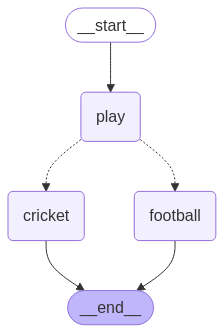

In [9]:
graph_builder  = graph.compile()

display(Image(graph_builder.get_graph().draw_mermaid_png()))